# **Prova Final: Computação Científica II - 2023**
##### **Data**: 30/11/2023 - 03/12/2023
##### **Alune**: Igor Lima Strozzi
##### **DRE**: 112040449

**Observação**: vou escrever em inglês, estou mais acostumado.

## Questão 1


Temos o problema de contorno definido por, para $ (x, y) \in (0, 1)^2 $ ,
\begin{gather}
	-\nabla(\kappa\nabla T) = 0 \texttt{;} \\
	T(x, 0) = T(x, 1) = a \texttt{;} \\
	T(0, y) = b \texttt{;} \\
	-\kappa \frac{\partial T}{\partial x}(1, y) = h(T - T_{\text{out}})\texttt{.}
\end{gather}

É imediato observar que, de $(1)$ acima, temos $-\left( \frac{\partial}{\partial x}\left(\kappa \frac{\partial T}{\partial x}\right) + \frac{\partial}{\partial y}\left(\kappa \frac{\partial T}{\partial y}\right) \right) = - \left(\left( \kappa \frac{\partial^2 T}{\partial x^2}\right) + \left( \kappa \frac{\partial^2 T}{\partial y^2}\right)\right)$, portanto (sendo $\kappa > 0$), $b^2 - ac = 0^2 - (-\kappa)^2 < 0$, e portanto a equação $(1)$ é uma equação diferencial parcial elíptica.


Quanto à solução do problema. Façâmo-lo com o método de diferenças finitas.

Primeiramente, temos de escolher os parâmetros para a discretização do domínio e construção do reticulado (grid); especificamente, determinamos em quantas partes gostaríamos de dividir os intervalos a que $x$ e $y$ pertencem.
Chamemos esses parâmetros de $N_x$ e $N_y$. Fixados esses valores, definimos um reticulado $(N_x+1) \times (N_y+1)$, com pontos espaçados no eixo $x$ por $h_x = \frac{1}{N_x}$ e no eixo $y$ por $h_y = \frac{1}{N_y}$.

Isso feito, devemos discretizar a EDP. Comecemos observando que podemos facilmente aplicar a fórmula de diferença central para cada termo de $$-\kappa \left(\left(  \frac{\partial^2 T}{\partial x^2}\right) + \left(  \frac{\partial^2 T}{\partial y^2}\right)\right)$$
a fim de obter:
$$\begin{equation*}
\begin{aligned}
\frac{\partial^2 T}{\partial x^2} &= \frac{T_{i+1,j} - 2T_{i,j} + T_{i-1,j}}{h_x^2} \tag{5} \\
\frac{\partial^2 T}{\partial y^2} &= \frac{T_{i,j+1} - 2T_{i,j} + T_{i,j-1}}{h_y^2} 
\end{aligned}
\end{equation*}$$

O objetivo é construir um sistema linear que, resolvido, aproxime a solução do problema. Para tanto, é necessário (ou pelo menos útil) que reindexemos as expressões acima, de modo a usar um só índice, $n$. Usaremos uma fórmula, que pra pontos interioriores do reticulado, fornece essa reindexação, a partir de um ponto $(N_y, 1)$, da esquerda para a direita, de baixo para cima. A fórmula é:
$$\iota (i, j;\, N_x, N_y)=(N_y​−i)N_x​+j \eqqcolon n$$


Com isso, podemos reescrever as equações discretizadas acima, agora sob a nova indexação:
$$\begin{equation*}
\begin{aligned}
\frac{\partial^2 T}{\partial x^2} &= \frac{T_{n+1} - 2T_{n} + T_{n-1}}{h_x^2} \tag{6} \\
\frac{\partial^2 T}{\partial y^2} &= \frac{T_{n + N_x} - 2T_{n} + T_{n - N_x}}{h_y^2}
\end{aligned}
\end{equation*}$$

Voltando à equação do calor, temos: 
$$\begin{equation*}
-\nabla(\kappa\nabla T) = -\kappa\left(\frac{T_{n+1} - 2T_{n} + T_{n-1}}{h_x^2} + \frac{T_{n + N_x} - 2T_{n} + T_{n - N_x}}{h_y^2}\right) = 0
\end{equation*}$$

Fazendo
$$
\alpha_x = \frac{-\kappa}{h_x^2}; \; \; \alpha_y = \frac{-\kappa}{h_y^2}
$$ 
e reorganizando os termos, obtemos:
$$
\nabla^2 T = -2 (\alpha_x + \alpha_y) T_n + \alpha_x(T_{n+1}+T_{n-1}) + \alpha_y(T_{n+N_x}+T_{n-N_x}) = 0 \tag{7}
$$

Temos, agora, que aplicar, sobre a equação acima, as condições de contorno. Isso exige a análise individual de cada ponto cuja vizinhança intercepte o bordo. Mas é útil observar que, na forma acima, temos os $\alpha$ multiplicando precisamente os termos que correspondem à sua dimensão. Mais especificamente, $T_{n+N_x}$ é o vizinho acima de $T_n$, $T_{n-N_x}$, o vizinho abaixo. O mesmo vale para $T_{n+1}$ e $T_{n-1}$.

Deste modo, temos, por exemplo, para o primeiro ponto do grid, $T_{N_y, 1} = T_1$, temos a equação:
$$
-2 (\alpha_x + \alpha_y) T_n + \alpha_x(T_{n+1}+a) + \alpha_y(T_{n+N_x}+b) = 0
$$
da qual isolamos as constantes obtidas pelas condições de contorno, obtendo:
$$
-2 (\alpha_x + \alpha_y) T_n + \alpha_x T_{n+1} + \alpha_y T_{n+N_x} = -(\alpha_x a + \alpha_y b)
$$
que, fazendo $n = 1$, nos dá a primeira equação do nosso sistema (considere $N_x = 3$, $N_y = 4$):
$$
\begin{equation*}
-2 (\alpha_x + \alpha_y) T_1 + \alpha_x T_{2} + \alpha_y T_{4} = -(\alpha_x a + \alpha_y b) 
\tag{8.1}
\end{equation*}
$$

Seguimos analogamente. Para o segundo ponto, temos:
$$
-2 (\alpha_x + \alpha_y) T_2 + \alpha_x(T_{3}+T_{1}) + \alpha_y(T_{5}+a) = 0
$$
logo
$$
\begin{equation}
-2 (\alpha_x + \alpha_y) T_2 + \alpha_x(T_{3}+T_{1}) + \alpha_y T_{5} = -\alpha_y a \tag{8.2}
\end{equation}
$$

Para o terceiro ponto da malha, temos de lidar com a condição de contorno de Robin. Para tanto, comecemos observando que podemos discretizar a equação
$$
-\kappa \frac{\partial T}{\partial x} = h(T - T_{\text{out}})
$$
usando, novamente, a diferença central, i.e,
$$
 -\kappa \frac{T_{n+1} - T_{n-1}}{2 h_x} = h(T - T_{\text{out}})
$$
com a qual definimos os $T_{n+1}$ nos pontos do bordo $(1, x)$.

Isolando $T_{n+1}$ a partir da equação acima, obtemos:

$$
T_{n+1} = -\beta T_n + T_{n-1} + \beta T_{\text{out}}; \tag{8.3.1}
$$
onde 
$$\beta = \frac{2 h_x h}{\kappa}$$

De forma geral, portanto, nos casos em que se faz necessário o uso da condição de contorno de Robin, temos, aplicando $(8.3.1)$ em $(7)$:
$$
\begin{aligned}
-2 (\alpha_x + \alpha_y) T_n + \alpha_x(-\beta T_n + T_{n-1} + \beta T_{\text{out}}+T_{n-1}) + \alpha_y(T_{n+N_x}+T_{n-N_x}) = 0 \\
-2 (\alpha_x + \alpha_y) T_n -\alpha_x\beta T_n + 2 \alpha_x T_{n-1} + \alpha_x \beta T_{\text{out}} + \alpha_y(T_{n+N_x}+T_{n-N_x}) = 0 \\
\end{aligned}
$$
daí:
$$
- (\alpha_x (2 + \beta) + 2 \alpha_y) T_n + 2 \alpha_x T_{n-1} + \alpha_y(T_{n+N_x}+T_{n-N_x}) = -\alpha_x \beta T_{\text{out}} \tag{8.3.2}
$$

Agora, de volta à equação $(7)$, fazendo $n = 3$ e aplicando a expressão obtida acima $(8.3.2)$ com a adição da condição de Dirichlet do bordo inferior: 

$$
\begin{align*}
- (\alpha_x (2 + \beta) + 2 \alpha_y) T_3 + 2 \alpha_x T_{2} + \alpha_y(T_{6}+a) &= -\alpha_x \beta T_{\text{out}} \\
- (\alpha_x (2 + \beta) + 2 \alpha_y) T_3 + 2 \alpha_x T_{2} + \alpha_y T_{6} &= -\alpha_x \beta T_{\text{out}} - \alpha_y a \tag{8.3}
\end{align*}
$$


Os demais casos são similares. Desenvolvi no papel e vou escrever apenas os resultados, pra cada dos pontos.

* $n = 4$
$$
-2 (\alpha_x + \alpha_y) T_4 + \alpha_x T_{5} + \alpha_y(T_{7}+T_{1}) = -\alpha_x b \tag{8.4}
$$

* $n = 5$
$$
-2 (\alpha_x + \alpha_y) T_5 + \alpha_x(T_{6}+T_{4}) + \alpha_y(T_{8}+T_{2}) = 0 \tag{8.5}
$$

* $n = 6$
$$
- (\alpha_x (2 + \beta) + 2 \alpha_y) T_6 + 2 \alpha_x T_{5} + \alpha_y(T_{9}+T_{3}) = -\alpha_x \beta T_{\text{out}} \tag{8.6}
$$

* $n = 7$
$$
-2 (\alpha_x + \alpha_y) T_7 + \alpha_x T_{8} + \alpha_y T_{4} = -(\alpha_x b + \alpha_y a) \tag{8.7}
$$

* $n = 8$
$$
-2 (\alpha_x + \alpha_y) T_8 + \alpha_x (T_7 + T_9) + \alpha_y T_5 = -\alpha_y a \tag{8.8}
$$

* $n = 9$
$$
- (\alpha_x (2 + \beta) + 2 \alpha_y) T_9 + 2 \alpha_x T_{8} + \alpha_y T_{6} = -(\alpha_x \beta T_{\text{out}} + \alpha_y a) \tag{8.9}
$$

Essas equações nos fornecem um sistema da forma:
$$
\mathrm{A}\mathbf{T} = \mathbf{b}
$$
onde $\mathrm{A}$ é

$$
\mathrm{A} = \begin{bmatrix}
	-2(\alpha_x + \alpha_y) & \alpha_x            & 0                   & \alpha_y            & 0                   & 0                   & 0                   & 0                   & 0 \\
	\alpha_x               & -2(\alpha_x + \alpha_y) & \alpha_x            & 0                   & \alpha_y            & 0                   & 0                   & 0                   & 0 \\
	0                   & \alpha_x            & -(2\alpha_x (1 + \beta/2) + 2\alpha_y) & 0                   & 0                   & \alpha_y            & 0                   & 0                   & 0 \\
	\alpha_y               & 0                   & 0                   & -2(\alpha_x + \alpha_y) & \alpha_x            & 0                   & \alpha_y            & 0                   & 0 \\
	0                   & \alpha_y            & 0                   & \alpha_x            & -2(\alpha_x + \alpha_y) & \alpha_x            & 0                   & \alpha_y            & 0 \\
	0                   & 0                   & \alpha_y            & 0                   & \alpha_x            & -(2\alpha_x (1 + \beta/2) + 2\alpha_y) & 0                   & 0                   & \alpha_y \\
	0                   & 0                   & 0                   & \alpha_y            & 0                   & 0                   & -2(\alpha_x + \alpha_y) & \alpha_x            & 0 \\
	0                   & 0                   & 0                   & 0                   & \alpha_y            & 0                   & \alpha_x            & -2(\alpha_x + \alpha_y) & \alpha_x \\
	0                   & 0                   & 0                   & 0                   & 0                   & \alpha_y            & 0                   & \alpha_x            & -(2\alpha_x (1 + \beta/2) + 2\alpha_y)
\end{bmatrix}
$$

e $\mathbf{T}$ e $\mathbf{b}$ são

$$
\mathbf{T} = \begin{bmatrix}
	T_1 \\
	T_2 \\
	T_3 \\
	T_4 \\
	T_5 \\
	T_6 \\
	T_7 \\
	T_8 \\
	T_9
\end{bmatrix}, \;
\mathbf{b} = \begin{bmatrix}
	-(\alpha_x a + \alpha_y b) \\
	-\alpha_y a \\
	-\alpha_x \beta T_{\text{out}} - \alpha_y a \\
	-\alpha_x b \\
	0 \\
	-\alpha_x \beta T_{\text{out}} \\
	-(\alpha_x b + \alpha_y a) \\
	-\alpha_y a \\
	-(\alpha_x \beta T_{\text{out}} + \alpha_y a)
\end{bmatrix}
$$

O código abaixo usa o método `scipy.linalg.solve` para resolver o sistema para $\mathbf{T}$, construindo a matriz $\mathrm{A}$ e o vetor $\mathbf{b}$ a partir dos valores que ocorrem em $\mathrm{A}$ e $\mathbf{b}$.

In [26]:
import numpy as np
from scipy.linalg import solve

def create_coefficient_matrix_and_vector(alpha_x, alpha_y, beta, a, b, T_out):
    """
    Create the coefficient matrix A and vector b for the given values.

    Parameters:
    alpha_x (float): Coefficient corresponding to the x-dimension.
    alpha_y (float): Coefficient corresponding to the y-dimension.
    beta (float): Coefficient corresponding to the boundary condition.
    a (float): Boundary condition at x = 0.
    b (float): Boundary condition at y = 0.
    T_out (float): Temperature outside the domain.

    Returns:
    numpy.ndarray: The coefficient matrix A.
    numpy.ndarray: The vector b.
    """
    # Define the matrix A as before
    A = np.array([
        [-2*(alpha_x + alpha_y), alpha_x, 0, alpha_y, 0, 0, 0, 0, 0],
        [alpha_x, -2*(alpha_x + alpha_y), alpha_x, 0, alpha_y, 0, 0, 0, 0],
        [0, alpha_x, -(2*alpha_x*(1 + beta/2) + 2*alpha_y), 0, 0, alpha_y, 0, 0, 0],
        [alpha_y, 0, 0, -2*(alpha_x + alpha_y), alpha_x, 0, alpha_y, 0, 0],
        [0, alpha_y, 0, alpha_x, -2*(alpha_x + alpha_y), alpha_x, 0, alpha_y, 0],
        [0, 0, alpha_y, 0, alpha_x, -(2*alpha_x*(1 + beta/2) + 2*alpha_y), 0, 0, alpha_y],
        [0, 0, 0, alpha_y, 0, 0, -2*(alpha_x + alpha_y), alpha_x, 0],
        [0, 0, 0, 0, alpha_y, 0, alpha_x, -2*(alpha_x + alpha_y), alpha_x],
        [0, 0, 0, 0, 0, alpha_y, 0, alpha_x, -(2*alpha_x*(1 + beta/2) + 2*alpha_y)]
    ])

    # Define the vector b
    b = np.array([
        -(alpha_x * a + alpha_y * b),
        -alpha_y * a,
        -alpha_x * beta * T_out - alpha_y * a,
        -alpha_x * b,
        0,
        -alpha_x * beta * T_out,
        -(alpha_x * b + alpha_y * a),
        -alpha_y * a,
        -(alpha_x * beta * T_out + alpha_y * a)
    ])
    
    return A, b

# Define parameters
kappa = 1e-4  # Thermal conductivity
h = 1e-2      # Heat transfer coefficient
a = 200       # Boundary condition at x = 0
b = 400       # Boundary condition at y = 0
T_out = 10   # Temperature outside the domain

# Define the grid size
N_x = 3  # Number of columns
N_y = 4  # Number of rows
    
# Calculate alpha_x, alpha_y, and beta
h_x = 1 / N_x
h_y = 1 / N_y
alpha_x = -kappa / h_x**2
alpha_y = -kappa / h_y**2
beta = 2 * h_x * h / kappa

# Create the matrix A and vector b with the given coefficients
A, b = create_coefficient_matrix_and_vector(alpha_x, alpha_y, beta, a, b, T_out)

# Display the matrix A and vector b
print("The coefficient matrix A is:")
print(A)
print("\nThe vector b is:")
print(b)

# Solve the system AT = b
T = solve(A, b)

# Print the solution vector T
print("The solution vector T is:")
print(T)


The coefficient matrix A is:
[[ 0.005  -0.0009  0.     -0.0016  0.      0.      0.      0.      0.    ]
 [-0.0009  0.005  -0.0009  0.     -0.0016  0.      0.      0.      0.    ]
 [ 0.     -0.0009  0.065   0.      0.     -0.0016  0.      0.      0.    ]
 [-0.0016  0.      0.      0.005  -0.0009  0.     -0.0016  0.      0.    ]
 [ 0.     -0.0016  0.     -0.0009  0.005  -0.0009  0.     -0.0016  0.    ]
 [ 0.      0.     -0.0016  0.     -0.0009  0.065   0.      0.     -0.0016]
 [ 0.      0.      0.     -0.0016  0.      0.      0.005  -0.0009  0.    ]
 [ 0.      0.      0.      0.     -0.0016  0.     -0.0009  0.005  -0.0009]
 [ 0.      0.      0.      0.      0.     -0.0016  0.     -0.0009  0.065 ]]

The vector b is:
[0.82 0.32 0.92 0.36 0.   0.6  0.68 0.32 0.92]
The solution vector T is:
[280.77195239 167.6496284   16.77600492 270.60943523 156.53436277
  12.22228385 251.83195366 162.42741326  16.70369732]


In [22]:
%load_ext itikz

The itikz extension is already loaded. To reload it, use:
  %reload_ext itikz


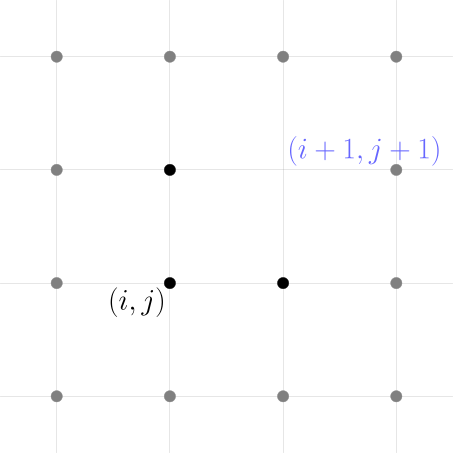

In [9]:
%%itikz
\documentclass[tikz]{standalone}
\begin{document}
\begin{tikzpicture}[scale=2, every node/.style={scale=1.2}]
  
  
    \draw [style=help lines, step=2]                (-1,-1)    grid        (+7,+7);
    
    
    \draw [black!] (  2,  2) node[anchor=north east] {\Huge $(i, j)$};
    \draw [blue!60!white] (  4,  4) node[anchor=south west] {\Huge $(i+1,j+1)$};

    \filldraw [color=gray]    (0,0) circle (.1);
    \filldraw [color=gray]    (0,2) circle (.1);
    \filldraw [color=gray]    (0,4) circle (.1);
    \filldraw [color=gray]    (0,6) circle (.1);
    \filldraw [color=gray]    (2,0) circle (.1);
    \filldraw [color=black]    (2,2) circle (.1);
    \filldraw [color=black]    (2,4) circle (.1);
    \filldraw [color=gray]    (2,6) circle (.1);
    \filldraw [color=gray]    (4,0) circle (.1);
    \filldraw [color=black]    (4,2) circle (.1);

    \filldraw [color=gray]    (4,6) circle (.1);
    \filldraw [color=gray]    (6,0) circle (.1);
    \filldraw [color=gray]    (6,2) circle (.1);
    \filldraw [color=gray]    (6,4) circle (.1);
    \filldraw [color=gray]    (6,6) circle (.1);
  
\end{tikzpicture}
\end{document}

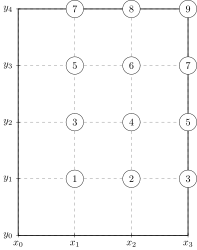

In [4]:
%%itikz
\documentclass[tikz]{standalone}
\begin{document}
\begin{tikzpicture}[scale=2, every node/.style={scale=1}]

    
    \draw[step=1cm,gray,thin, dashed] (0,0) grid (3,4);
    
    
    \draw[thick] (0,0) rectangle (3,4);
    
    
    \foreach \x in {0,...,3} 
        \draw (\x cm,1pt) -- (\x cm,-1pt) node[anchor=north] {$x_{\x}$};
    
    
    \foreach \y in {0,...,4} 
        \draw (1pt,\y cm) -- (-1pt,\y cm) node[anchor=east] {$y_{\y}$};

    
    \foreach \y in {1,...,4}
        \foreach \x in {1,...,3}
            \node[circle, draw, fill=white] at (\x,\y) {\pgfmathparse{int((\y-1)*2+\x)}\pgfmathresult};

\end{tikzpicture}
\end{document}

In [5]:
%%itikz
\begin{tikzpicture}[scale=1, every node/.style={scale=1}]

    
    \draw[step=1cm,gray,very thin, dashed] (0,0) grid (4,3);
    
    
    \draw[thick] (0,0) rectangle (4,3);
    
    
    \foreach \x in {0,...,4} 
        \draw (\x cm,1pt) -- (\x cm,-1pt) node[anchor=north] {$x_{\x}$};
    
    
    \foreach \y in {0,...,3} 
        \draw (1pt,\y cm) -- (-1pt,\y cm) node[anchor=east] {$y_{\y}$};

    
    \foreach \y in {1,...,3}
        \foreach \x in {1,...,4}
            \node[circle, draw, fill=white] at (\x-0.5,\y-0.5) {\pgfmathparse{int((\y-1)*4+\x)}\pgfmathresult};

\end{tikzpicture}

KeyboardInterrupt: 

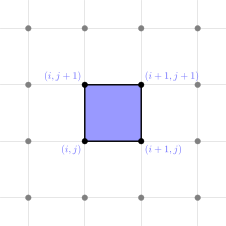

In [ ]:
%%itikz --file-prefix implicit-demo- --implicit-pic 


\draw [style=help lines, step=2]                (-1,-1)    grid        (+7,+7);
\draw [line width=0.5mm, fill=blue!40!white]    (+2,+2)    rectangle    (+4,+4);
 
\draw [blue!60!white] (  2,  2) node[anchor=north east] {$(i  ,j  )$};
\draw [blue!60!white] (  4,  2) node[anchor=north west] {$(i+1,j  )$};
\draw [blue!60!white] (  4,  4) node[anchor=south west] {$(i+1,j+1)$};
\draw [blue!60!white] (  2,  4) node[anchor=south east] {$(i  ,j+1)$};

\filldraw [color=gray]    (0,0) circle (.1);
\filldraw [color=gray]    (0,2) circle (.1);
\filldraw [color=gray]    (0,4) circle (.1);
\filldraw [color=gray]    (0,6) circle (.1);
\filldraw [color=gray]    (2,0) circle (.1);
\filldraw [color=black]    (2,2) circle (.1);
\filldraw [color=black]    (2,4) circle (.1);
\filldraw [color=gray]    (2,6) circle (.1);
\filldraw [color=gray]    (4,0) circle (.1);
\filldraw [color=black]    (4,2) circle (.1);
\filldraw [color=black]    (4,4) circle (.1);
\filldraw [color=gray]    (4,6) circle (.1);
\filldraw [color=gray]    (6,0) circle (.1);
\filldraw [color=gray]    (6,2) circle (.1);
\filldraw [color=gray]    (6,4) circle (.1);
\filldraw [color=gray]    (6,6) circle (.1);



In [ ]:
!rm implicit-demo*

%%itikz
\documentclass[tikz]{standalone}
\begin{document}
	\begin{tikzpicture}
		% Draw a 3x4 grid with dashed lines
		\draw[step=1cm,gray,very thin, dashed] (0,0) grid (3,4);
		
		% Draw the boundary of the grid
		\draw[thick] (0,0) -- (0,4) -- (3,4) -- (3,0) -- cycle;
		
		% Place dots at each intersection of the grid
		\foreach \x in {0,1,2,3}
		\foreach \y in {0,1,2,3,4}
		\filldraw[black] (\x,\y) circle (2pt);
		
		% Add labels next to the grid
		\node at (-0.5, 2) {$b$};
		\node at (1.5, 4.5) {$a$};
		\node at (1.5, -0.5) {$a$};
		\node[align=center] at (4.8, 2) {$-\kappa \frac{\partial T}{\partial x}$ \\ $= h(T - T_{\text{out}})$};
	\end{tikzpicture}
\end{document}